In [7]:
from election import *
from voters import *
from parties import *
from scipy.stats import truncnorm, uniform
import matplotlib.pyplot as plt

demographic = {Saint: [[] for i in range(300)], Spineless:[[] for i in range(100)],
                Opportunist:[[3] for i in range(200)], Follower:[[3] for i in range(200)], 
                NonConformist:[[3] for i in range(50)], Strategist:[[4,2] for i in range(200)]}

myelection = DHondt(demographic, 10, 150, 4, pdistr='uniform', vdistr='truncnorm', ddim=1)

results = myelection.run()
results[0], results[-1]


(Counter({Party(h, [0.3863207]): 26,
          Party(i, [0.58474136]): 22,
          Party(d, [-0.27513156]): 20,
          Party(g, [-0.00679941]): 20,
          Party(c, [-0.63283218]): 19,
          Party(j, [0.96917295]): 11,
          Party(e, [-0.13801082]): 10,
          Party(a, [-0.90373699]): 8,
          Party(b, [-0.8143266]): 8,
          Party(f, [-0.043021]): 6}),
 Counter({Party(h, [0.3863207]): 58,
          Party(d, [-0.27513156]): 36,
          Party(g, [-0.00679941]): 20,
          Party(c, [-0.63283218]): 10,
          Party(i, [0.58474136]): 7,
          Party(e, [-0.13801082]): 5,
          Party(j, [0.96917295]): 5,
          Party(f, [-0.043021]): 4,
          Party(b, [-0.8143266]): 3,
          Party(a, [-0.90373699]): 2}))

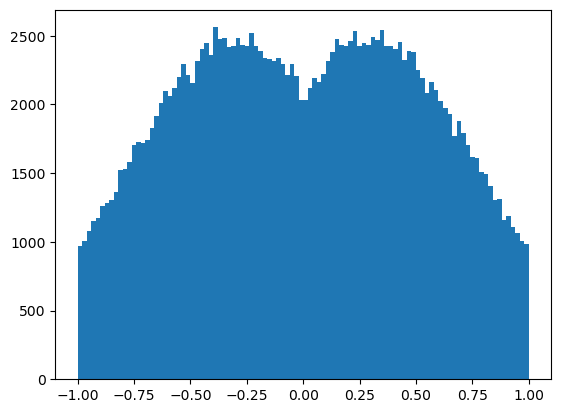

In [ ]:
import matplotlib.pyplot as plt
x1 = stats.truncnorm.rvs(-1.4, 0.6, loc=-0.3,scale=0.5, size=100000)
x2 = stats.truncnorm.rvs(-0.6,1.4, loc=0.3,scale=0.5, size=100000)

x = np.concatenate((x1, x2))

plt.hist(x,bins=100)
plt.show()

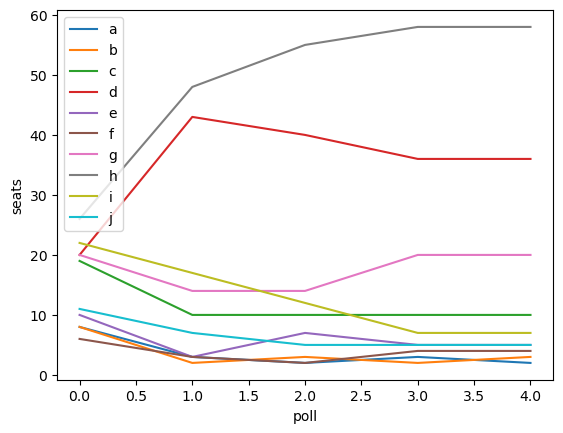

In [19]:
def plot_seats_over_time(results):
    seat_plot = {}
    for result in results:
        for party in result:
            if party.name not in seat_plot:
                seat_plot[party.name]=[result[party]]
            else:
                seat_plot[party.name].append(result[party])
    poll_nrs = range(len(results))
    for p in seat_plot.keys():
        plt.plot(poll_nrs, seat_plot[p], label=p)
    plt.xlabel("poll")
    plt.ylabel("seats")
    plt.legend()
    plt.show()
plot_seats_over_time(results)